In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from qutip.measurement import measure, measurement_statistics
from qutip.qip.operations import snot
from qutip.qip.operations import rx
from qutip.qip.operations import ry
from qutip.qip.operations import rz
from scipy.optimize import curve_fit
import datetime
import qutip.control.pulseoptim as cpo
from qutip.qip.operations import cnot
import matplotlib as mpl
from matplotlib import cm
from math import *

In [121]:
#recreating figure 2
#can ignore for now
#start with |0000> state
zero = basis(2,0)
one = basis(2,1)
X = sigmax()
Z = sigmaz()
I = qeye(2)

#measure XXXX
psi_ini = tensor(zero,zero,zero,zero)
meas = measure(psi_ini,tensor(X,X,X,X))
psi_f=0
if (abs(meas[0]-1)<0.01):
    psi_f=meas[1]
else:
    psi_f=tensor(Z,I,I,I)*meas[1]
print(psi_f)

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]]


In [84]:
#recreating figure 3
#measuring p3, did in sequence later but maybe helpful if you want to see results after each
#non-FT

#first initialize state as |00+0+>
zero = basis(2,0)
one = basis(2,1)
plus = (zero+one).unit()
psi_ini = tensor(zero,zero,plus,zero,plus)

#measure p3-p5
I = qeye(2)
X = sigmax()
Z = sigmaz()
p3=tensor(X,Z,I,I,Z)
p4=tensor(Z,X,Z,I,I)
p5=tensor(I,I,Z,X,Z)
#psi_f = measure(measure(measure(psi_ini,p3)[1],p4)[1],p5)
psi_f=measure(psi_ini,p3)
#print(psi_f)
#print(np.real(psi_f[1][0][0])[0])

for j in range(0,100):
    psi_f=measure(psi_ini,p3)
    if(psi_f[0]==1):
        for i in range(0,31):
            if(np.abs(np.real(psi_f[1][i][0])[0])>0.0001):
                print(i)
                print(np.real(psi_f[1][i][0])[0])
            
#psi_f_comp=(tensor(zero,zero,zero,zero,zero))
#print(psi_f_comp)

1
-0.7071067811865475
17
0.7071067811865477
5
-0.7071067811865475
21
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
4
-0.7071067811865475
20
-0.7071067811865477
5
-0.7071067811865475
21
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
5
-0.7071067811865475
21
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
4
-0.7071067811865475
20
-0.7071067811865477
0
-0.7071067811865475
16
-0.7071067811865477
5
-0.7071067811865475
21
0.7071067811865477
4
-0.7071067811865475
20
-0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
1
-0.7071067811865475
17
0.7071067811865477
1
-0.7071067811865475
1

In [103]:
#possible results after p3
psi1 = (-tensor(zero,zero,zero,zero,zero)-tensor(one,zero,zero,zero,zero)).unit()
psi2 = (-tensor(zero,zero,one,zero,zero)-tensor(one,zero,one,zero,zero)).unit()
psi3 = (-tensor(zero,zero,zero,zero,one)+tensor(one,zero,zero,zero,one)).unit()
psi4 = (-tensor(zero,zero,one,zero,one)+tensor(one,zero,one,zero,one)).unit()

#psi_f1=measure(psi1,p4)
#psi_f2=measure(psi2,p4)
#psi_f3=measure(psi3,p4)
#psi_f4=measure(psi4,p4)

#can select result from p3 measurement to test out what p4 measurements look like
for j in range(0,100):
    psi_f=measure(psi1,p4)
    if(psi_f[0]==1):
        for i in range(0,31):
            if(np.abs(np.real(psi_f[1][i][0])[0])>0.0001):
                print(i)
                print(np.real(psi_f[1][i][0])[0])
#psi_f_comp=(tensor(zero,zero,zero,zero,zero))
#print(psi_f_comp)

16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
0
-0.7071067811865475
8
-0.7071067811865477
16
-0.7071067811865475
24
0.7071067811865477
16
-0.7071067811865475

In [100]:
#basically same as last cell but for p5
psi5 = (-tensor(one,zero,zero,zero,zero)+tensor(one,one,zero,zero,zero)).unit()
psi6 = (-tensor(zero,zero,zero,zero,zero)-tensor(zero,one,zero,zero,zero)).unit()
psi7 = (-tensor(zero,zero,one,zero,zero)+tensor(zero,one,one,zero,zero)).unit()
psi8 = (-tensor(one,zero,one,zero,zero)-tensor(one,one,one,zero,zero)).unit()
psi9 = (tensor(zero,zero,zero,zero,one)+tensor(zero,one,zero,zero,one)).unit()
psi10 = (-tensor(one,zero,zero,zero,one)+tensor(one,one,zero,zero,one)).unit()
psi11 = (-tensor(zero,zero,one,zero,one)+tensor(zero,one,one,zero,one)).unit()
psi12 = (tensor(one,zero,one,zero,one)+tensor(one,one,one,zero,one)).unit()

for j in range(0,100):
    psi_f=measure(psi12,p5)
    if(psi_f[0]==1):
        for i in range(0,32):
            if(np.abs(np.real(psi_f[1][i][0])[0])>0.0001):
                print(i)
                print(np.real(psi_f[1][i][0])[0])

21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
29
0.7071067811865475
31
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
21
0.7071067811865475
23
0.7071067811865477
29
0.7071067811865475
31
0.70710

In [158]:
#recreating figure 3
#non-FT

#first initialize state as |00+0+>
zero = basis(2,0)
one = basis(2,1)
plus = (zero+one).unit()
psi_ini = tensor(zero,zero,plus,zero,plus)

#measure p3-p5
I = qeye(2)
X = sigmax()
Y = sigmax()
Z = sigmaz()
p1=tensor(I,Z,X,Z,I)
p2=tensor(Z,I,I,Z,X)
p3=tensor(X,Z,I,I,Z)
p4=tensor(Z,X,Z,I,I)
p5=tensor(I,I,Z,X,Z)

#implementation of non-FT
for j in range(0,100):
    psi_3=measure(psi_ini,p3*p2*p1)
    if(psi_3[0]==1):
        psi_4=measure(psi_3[1],p4*p3*p2*p1)
        if(psi_4[0]==1):
            psi_5=measure(psi_4[1],p5*p4*p3*p2*p1)
            if(psi_5[0]==1):
                print(psi_5[1])
                
print("\n\n\n ERROR!!!")

#add error during p5 on 4(Y) and 5(Z)
for j in range(0,100):
    psi_3=measure(psi_ini,p3)
    if(psi_3[0]==1):
        psi_4=measure(psi_3[1],p4)
        if(psi_4[0]==1):
            psi_err = tensor(I,I,I,Y,Z)*psi_4[1]
            psi_5=measure(psi_err,p5)
            if(psi_5[0]==1):
                print(psi_5[1])


"""                        
#this is for all of them but starting at 00000 and using p1 and p2 as a test
for j in range(0,100):
    psi_1=measure(tensor(zero,zero,zero,zero,zero),p1)
    if(psi_1[0]==1):
        psi_2=measure(psi_1[1],p2)
        if(psi_2[0]==1):
            psi_3=measure(psi_2[1],p3)
            if(psi_3[0]==1):
                psi_4=measure(psi_3[1],p4)
                if(psi_4[0]==1):
                    psi_5=measure(psi_4[1],p5)
                    if(psi_5[0]==1):
                        print(psi_5[1])
"""

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0. 

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0. 

'                        \n#this is for all of them but starting at 00000 and using p1 and p2 as a test\nfor j in range(0,100):\n    psi_1=measure(tensor(zero,zero,zero,zero,zero),p1)\n    if(psi_1[0]==1):\n        psi_2=measure(psi_1[1],p2)\n        if(psi_2[0]==1):\n            psi_3=measure(psi_2[1],p3)\n            if(psi_3[0]==1):\n                psi_4=measure(psi_3[1],p4)\n                if(psi_4[0]==1):\n                    psi_5=measure(psi_4[1],p5)\n                    if(psi_5[0]==1):\n                        print(psi_5[1])\n'

In [150]:
#just checking the measurement after p1
for j in range(0,10):
    psi_1=measure(tensor(zero,zero,zero,zero,zero),p1)
    if(psi_1[0]==1):
        print(psi_1)

(1.0, Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]])
(1.0, Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.   

In [137]:
#this was some averaging thing, not gonna use so you dont have to read
#was supposed to approach |-----> but k has to be annoyingly big
pav3=0
pav4=0
pav5=0
k=5000

psi_ini = tensor(zero,zero,plus,zero,plus)

for j in range(0,k):
    psi_3=measure(psi_ini,p3)
    if(psi_3[0]==1):
        pav3+=psi_3[1]
pav3=pav3.unit()

for j in range(0,k):
    psi_4=measure(pav3,p4)
    if(psi_4[0]==1):
        pav4+=psi_4[1]
pav4=pav4.unit()

for j in range(0,k):
    psi_5=measure(pav4,p5)
    if(psi_5[0]==1):
        pav5+=psi_5[1]
pav5=pav5.unit()
print(pav5)

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[-0.14870237]
 [-0.21430635]
 [-0.14870237]
 [ 0.21430635]
 [-0.13558157]
 [ 0.13120797]
 [ 0.13558157]
 [ 0.13120797]
 [-0.17494396]
 [-0.21211955]
 [-0.17494396]
 [ 0.21211955]
 [-0.12246077]
 [ 0.13339477]
 [ 0.12246077]
 [ 0.13339477]
 [-0.22852055]
 [-0.21430635]
 [-0.22852055]
 [ 0.21430635]
 [-0.16838356]
 [ 0.13011457]
 [ 0.16838356]
 [ 0.13011457]
 [-0.23180075]
 [-0.20555915]
 [-0.23180075]
 [ 0.20555915]
 [-0.15635616]
 [ 0.15526276]
 [ 0.15635616]
 [ 0.15526276]]


In [152]:
#fault tolerant encoding
#these are just T1 and T2
T1=p2*p4*p5
T2=p1*p3*p5

In [153]:
#pf is the logical minus state (goal)
pf=(tensor(zero,zero,zero,zero,zero)-tensor(one,one,one,one,one)).unit()
#can check if pf is an eigenstate of whatever gate sequence by seeing if these two are the same
#shows pf is not an eigenstate of the entire sequence which is bad lol
print(pf)
print(p1*p2*p3*p4*p5*T1*T2*pf)

Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]]
Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0. 

In [205]:
#better measurement
minL=(tensor(zero,zero,zero,zero,zero)-tensor(one,one,one,one,one)).unit()
plusL=(tensor(zero,zero,zero,zero,zero)+tensor(one,one,one,one,one)).unit()
x1m=tensor(X,I,I,I,I)*minL
x2m=tensor(I,X,I,I,I)*minL
x3m=tensor(I,I,X,I,I)*minL
x4m=tensor(I,I,I,X,I)*minL
x5m=tensor(I,I,I,I,X)*minL
y1m=tensor(Y,I,I,I,I)*minL
y2m=tensor(I,Y,I,I,I)*minL
y3m=tensor(I,I,Y,I,I)*minL
y4m=tensor(I,I,I,Y,I)*minL
y5m=tensor(I,I,I,I,Y)*minL
z1m=tensor(Z,I,I,I,I)*minL
z2m=tensor(I,Z,I,I,I)*minL
z3m=tensor(I,I,Z,I,I)*minL
z4m=tensor(I,I,I,Z,I)*minL
z5m=tensor(I,I,I,I,Z)*minL
merr=[x1m,x2m,x3m,x4m,x5m,y1m,y2m,y3m,y4m,y5m,z1m,z2m,z3m,z4m,z5m]
x1p=tensor(X,I,I,I,I)*plusL
x2p=tensor(I,X,I,I,I)*plusL
x3p=tensor(I,I,X,I,I)*plusL
x4p=tensor(I,I,I,X,I)*plusL
x5p=tensor(I,I,I,I,X)*plusL
y1p=tensor(Y,I,I,I,I)*plusL
y2p=tensor(I,Y,I,I,I)*plusL
y3p=tensor(I,I,Y,I,I)*plusL
y4p=tensor(I,I,I,Y,I)*plusL
y5p=tensor(I,I,I,I,Y)*plusL
z1p=tensor(Z,I,I,I,I)*plusL
z2p=tensor(I,Z,I,I,I)*plusL
z3p=tensor(I,I,Z,I,I)*plusL
z4p=tensor(I,I,I,Z,I)*plusL
z5p=tensor(I,I,I,I,Z)*plusL
perr=[x1p,x2p,x3p,x4p,x5p,y1p,y2p,y3p,y4p,y5p,z1p,z2p,z3p,z4p,z5p]

    
    

from random import random
def probabilities(pe):
    P0m=0
    P0p=0
    P1m=0
    P1p=0
    for i in range(0,50):
        error=0
        if(random()<pe):
            error=tensor(I,I,I,Y,Z)
        else:
            error=tensor(I,I,I,I,I)
        psi=measure(tensor(zero,zero,zero,zero,zero),p5*error*p4*p3*p2*p1)
        P0m += (minL.dag()*psi[1])**2
        P0p += (plusL.dag()*psi[1])**2
        for j in range(0,15):
            P1m += (merr[j].dag()*psi[1])**2
            P1p += (perr[j].dag()*psi[1])**2
    sumps = np.real(P0m[0][0])[0]+np.real(P1m[0][0])[0]/15+np.real(P1p[0][0])[0]/15+np.real(P0p[0][0])[0]
    #return [np.real(P0m[0][0])[0]/sumps,np.real(P1m[0][0])[0]/sumps/15,np.real(P1p[0][0])[0]/sumps/15,np.real(P0p[0][0])[0]/sumps]
    return [np.real(P0m[0][0])[0],np.real(P1m[0][0])[0],np.real(P1p[0][0])[0],np.real(P0p[0][0])[0]]
    
p_list = np.linspace(0,1,20)
prob_list1 = []
prob_list2 = []
prob_list3 = []
prob_list4 = []
for i in p_list:
    prob_list1.append(probabilities(i)[0])
    prob_list2.append(probabilities(i)[1])
    prob_list3.append(probabilities(i)[2])
    prob_list4.append(probabilities(i)[3])

(0.0, 1.0)

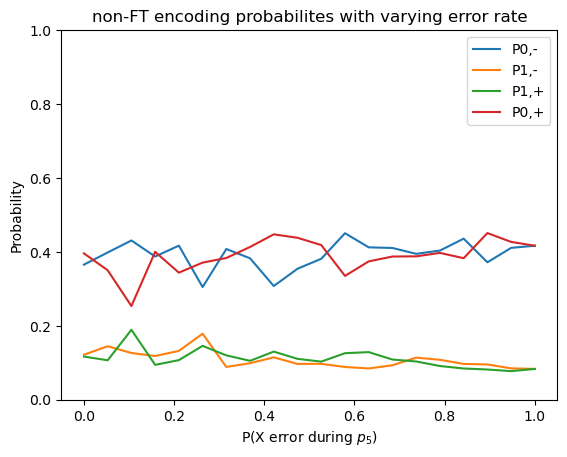

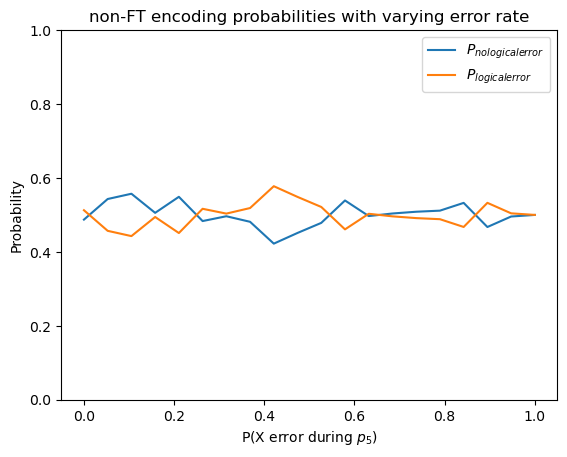

In [214]:
p_tot=np.array(prob_list1)+np.array(prob_list2)/15+np.array(prob_list3)/15+np.array(prob_list4)
plt.plot(p_list,np.array(prob_list1)/p_tot,label="P0,-")
plt.plot(p_list,np.array(prob_list2)/p_tot/15,label="P1,-")
plt.plot(p_list,np.array(prob_list3)/p_tot/15,label="P1,+")
plt.plot(p_list,np.array(prob_list4)/p_tot,label="P0,+")
plt.legend()
plt.title("non-FT encoding probabilites with varying error rate")
plt.xlabel(r'P(X error during $p_5$)')
plt.ylabel("Probability")
plt.ylim([0,1])
plt.figure()
plt.plot(p_list,np.array(prob_list1)/p_tot+np.array(prob_list2)/p_tot/15,label=r'$P_{no logical error}$')
plt.plot(p_list,np.array(prob_list3)/p_tot/15+np.array(prob_list4)/p_tot,label=r'$P_{logical error}$')
plt.legend()
plt.title("non-FT encoding probabilities with varying error rate")
plt.xlabel(r'P(X error during $p_5$)')
plt.ylabel("Probability")
plt.ylim([0,1])

In [234]:
zero = basis(2,0)
one = basis(2,1)
plus = (zero+one).unit()
minus = (zero-one).unit()

p01_ops=[tensor(I,Z,X,Z,I),tensor(Z,I,I,Z,X),tensor(X,Z,I,I,Z),tensor(Z,X,Z,I,I),tensor(I,I,Z,X,Z),tensor(Y,I,X,I,Y),tensor(I,Y,Y,I,X),tensor(X,I,Y,Y,I),tensor(I,X,I,Y,Y),tensor(Y,Y,I,X,I),-tensor(Z,Z,Y,X,Y),-tensor(Y,X,Y,Z,Z),-tensor(Z,Y,X,Y,Z),-tensor(X,Y,Z,Z,Y),-tensor(Y,Z,Z,Y,X),-tensor(X,X,X,X,X),tensor(I,X,Z,Z,X),tensor(I,Y,X,X,Y),tensor(I,Z,Y,Y,Z),tensor(X,I,X,Z,Z),tensor(X,X,Y,I,Y),tensor(X,Y,I,Y,X),tensor(X,Z,Z,X,I),tensor(Y,I,Y,X,X),tensor(Y,X,X,Y,I),tensor(Y,Y,Z,I,Z),tensor(Y,Z,I,Z,Y),tensor(Z,I,Z,Y,Y),tensor(Z,X,I,X,Z),tensor(Z,Y,Y,Z,I),tensor(Z,Z,X,I,X)]
p01=1/32

psi_s = tensor(zero,zero,zero,zero,zero)
for i in p01_ops:
    meas = measure(psi_s,i)
    if(meas[0]==1):
        psi_s = meas[1]
#print(psi_s)
#print(tensor(minus,minus,minus,minus,minus))


X=sigmax()
Y=sigmay()
Z=sigmaz()
I=qeye(2)

count=0
for i in p01_ops:
    exp=expect(i,tensor(minus,minus,minus,minus,minus))
    print(count," ",exp)
    p01+=exp/32
    count+=1
         
print(p01)
print(p01_ops[15])

0   0.0
1   0.0
2   0.0
3   -6.938893903907228e-18
4   0.0
5   0.0
6   6.938893903907228e-18
7   0.0
8   0.0
9   6.938893903907228e-18
10   0.0
11   0.0
12   0.0
13   0.0
14   0.0
15   0.9999999999999998
16   0.0
17   0.0
18   0.0
19   0.0
20   0.0
21   0.0
22   6.938893903907228e-18
23   -6.938893903907228e-18
24   0.0
25   0.0
26   0.0
27   0.0
28   0.0
29   0.0
30   6.938893903907228e-18
0.06249999999999999
Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0.  0.]
 ...
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]]


In [ ]:
p01_ops=[tensor(I,Z,X,Z,I),tensor(Z,I,I,Z,X),tensor(X,Z,I,I,Z),tensor(Z,X,Z,I,I),tensor(I,I,Z,X,Z),tensor(Y,I,X,I,Y),tensor(I,Y,Y,I,X),tensor(X,I,Y,Y,I),tensor(I,X,I,Y,Y),tensor(Y,Y,I,X,I),-tensor(Z,Z,Y,X,Y),-tensor(Y,X,Y,Z,Z),-tensor(Z,Y,X,Y,Z),-tensor(X,Y,Z,Z,Y),-tensor(Y,Z,Z,Y,X),-tensor(X,X,X,X,X),tensor(I,X,Z,Z,X),tensor(I,Y,X,X,Y),tensor(I,Z,Y,Y,Z),tensor(X,I,X,Z,Z),tensor(X,X,Y,I,Y),tensor(X,Y,I,Y,X),tensor(X,Z,Z,X,I),tensor(Y,I,Y,X,X),tensor(Y,X,X,Y,I),tensor(Y,Y,Z,I,Z),tensor(Y,Z,I,Z,Y),tensor(Z,I,Z,Y,Y),tensor(Z,X,I,X,Z),tensor(Z,Y,Y,Z,I),tensor(Z,Z,X,I,X)]
p01=1/32

for i in p01_ops:
    exp=expect(i,psi)
    p01+=exp/32

In [242]:
p1=tensor(I,Z,X,Z,I)
p2=tensor(Z,I,I,Z,X)
p3=tensor(X,Z,I,I,Z)
p4=tensor(Z,X,Z,I,I)
p5=tensor(I,I,Z,X,Z)

g1=tensor(X,Z,Z,X,I)
g2=tensor(I,X,Z,Z,X)
g3=tensor(X,I,X,Z,Z)
g4=tensor(Z,X,I,X,Z)


p1e = g1.eigenstates()
p2e = g2.eigenstates()
overlap=[]
for i in p1e[1]:
    for j in p2e[1]:
        if(isequal(i,j)):
            overlap.append(i)
overlap

[]